# Predict Credit Card Fraud

Predict credit card fraud using the data in `fraud_data.csv`. Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` and the `Amount` variable, which is the amount of the transaction. The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

This project is derived from an assignment from the online course [Applied Machine Learning in Python](https://www.coursera.org/learn/python-machine-learning). While the original assignment is organized as a series of questions and answers, I have reorganized and extended the assignment to illustrate prediction using an unbalanced data set.

The data in `fraud_data.csv` is sampled from a [larger dataset obtained from Kaggle](https://www.kaggle.com/isaikumar/creditcardfraud).  The original Kaggle dataset contains an equal number of fraud and not fraud records while 'fraud_data.csv' is an unbalanced sampling with a few fraud examples and many not fraud examples. In addition, the original Kaggle dataset contains a 'Time' column, which would introduce a time-series element to the problem. The 'fraud_data.csv' data file is provided by the course.

In [1]:
import numpy as np
import pandas as pd

## Import and inspect data from *fraud_data.csv*.

In [2]:
df = pd.read_csv('fraud_data.csv')

## Explore the fraud data in the data frame *df*.

In [3]:
len(df)

21693

In [12]:
list(df['V1'])

[1.17656255181218,
 0.6811094859498571,
 1.14072867493278,
 -1.1070732901366598,
 -0.314818210584509,
 -0.7132655233833951,
 1.21906014927591,
 0.6839181839407061,
 -1.12782007276595,
 -1.7577938917599898,
 0.34927704693896994,
 -0.411809717463036,
 -1.1666356016218602,
 -1.15606755739674,
 -1.1900375719891598,
 -1.92745281973369,
 -1.7471742008941902,
 -2.1680014044803,
 1.09517701629955,
 0.0124048644403335,
 1.24097174900597,
 -1.62395564540432,
 -0.493633979056369,
 0.8324627381509749,
 -0.864353596974226,
 1.01385595030302,
 -1.0325445395271,
 0.132131572611682,
 1.5419053698130398,
 -0.730463077360616,
 2.29926351819561,
 1.80018474263757,
 -0.8079246404405959,
 -0.4662322488724841,
 2.04909443633668,
 0.806151464766754,
 0.972194427191706,
 0.13756547506574898,
 -0.424757433060442,
 2.01953764690043,
 -0.0436838787022874,
 1.2201707983436298,
 0.0747535224513496,
 -0.263601818479385,
 -0.3219905552906189,
 1.21323808952138,
 1.19057666658281,
 1.77362261079471,
 1.02659863249836

In [6]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
5,-0.713266,0.869132,0.330114,0.902275,0.520836,-0.537036,0.301955,0.209117,-0.732441,-0.266402,...,0.114405,0.412489,0.223180,-0.430522,0.109774,-0.274569,-0.108067,-0.075318,4.95,0
6,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65,0
7,0.683918,0.329216,-1.693025,-1.123644,2.662177,3.563731,-0.309291,-0.043369,0.050627,-0.361619,...,1.072188,0.671990,-0.208488,0.735029,0.633444,-0.281231,0.299686,0.293389,1.00,0
8,-1.127820,1.461342,0.526673,-0.158998,0.353158,-1.539196,0.727383,0.299275,-0.778768,-1.662588,...,-0.068002,-0.494914,-0.343489,0.222014,0.541271,0.295158,-0.145161,-0.002592,0.76,0
9,-1.757794,0.821894,2.529482,-0.328198,-0.902062,0.739803,-0.119755,-0.797691,0.739508,3.458517,...,0.028491,0.778325,-0.073034,0.135780,-0.955393,-0.503613,-1.834281,-0.585528,10.00,0


In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,...,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,...,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,...,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,...,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,...,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,...,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701539,...,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


### Compute balance between fraud / not fraud records

In [6]:
fraud_cnt = sum(df['Class'] == 1)
not_fraud_cnt = sum(df['Class'] == 0)
total_cnt = len(df)
fraud_result = fraud_cnt /total_cnt * 100
not_fraud_result = not_fraud_cnt /total_cnt * 100
print("Percentage of fraud records: {:.3f} %".format(fraud_result))
print("Percentage of legitimate records: {:.3f} %".format(not_fraud_result))

Percentage of fraud records: 1.641 %
Percentage of legitimate records: 98.359 %


### Create training and test sets: X_train, X_test, y_train, y_test

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Training set percentage: {:.1f}%.".format(100*len(X_train)/len(df)))
print("Test set percentage: {:.1f}%.".format(100*len(X_test)/len(df)))

Training set percentage: 75.0%.
Test set percentage: 25.0%.


### Create and run dummy classifier

Since the data set is unbalanced, having many more 'not fraud' entries than 'fraud' entries, we first create and run a dummy classifier to give us a baseline from which to evaluate our classifiers. Since the most frequent class is 'not fraud' (Class = 0), the dummy classifier always predicts 'not fraud'. Since precision computes the ratio of true positive predictions to all positive predictions and the dummy classifier makes no positive predictions, the dummy predictions are converted to 0.0 to prevent division by 0. 

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

print("Dummy accuracy = ", accuracy_score(y_test, y_dummy_predictions))
print("Dummy recall = ", recall_score(y_test, y_dummy_predictions))
print("Dummy precision = ", precision_score(y_test, y_dummy_predictions))

Dummy accuracy =  0.9852507374631269
Dummy recall =  0.0
Dummy precision =  0.0


C:\Users\seoha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Create and run Support Vector classifier

Create and run a support vector classifier using scikit-learn and default settings.  This is basically a baseline for subsequent support vector classifiers.

Note that this classifier improves on all dummy metrics.  However, while the recall metric is probably the most important for this data, the recall result of 0.375 is far too low. Remember that recall is the ratio of true positive predictions to the sum of true positive and false negative predictions.  The recall metric measures the percentage of actual positive items in the test set that are identified as positive. We would like to identify as many fraud items as possible without creating too many false positives.

In [9]:
from sklearn.svm import SVC
svc = SVC(gamma='auto').fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

print("SVC accuracy = ", accuracy_score(y_test, svc_predicted))
print("SVC recall = ", recall_score(y_test, svc_predicted))
print("SVC precision = ", precision_score(y_test, svc_predicted))

SVC accuracy =  0.9907817109144543
SVC recall =  0.375
SVC precision =  1.0


## Dissect SciKit-Learn Confusion Matrix

$\begin{equation*}
\begin{vmatrix}
TN & FP \\
FN & TP \\
\end{vmatrix}
\end{equation*}$

$\begin{align}
\text{Where:}
\end{align}$

$\begin{equation*}
TN = \text{true negative} \\
FP = \text{false positive} \\
FN = \text{false negative} \\
TP = \text{true positive} \\
\end{equation*}$

In [10]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(confusion):
    print(' -----------')
    print('|{:5}|{:5}|'.format(confusion[0,0],confusion[0,1]))
    print('|-----|-----|')
    print('|{:5}|{:5}|'.format(confusion[1,0],confusion[1,1]))
    print(' -----------')

confusion = confusion_matrix(y_test, svc_predicted)
tn = confusion[0,0]
fp = confusion[0,1]
fn = confusion[1,0]
tp = confusion[1,1]
svc_accuracy = (tn + tp) / (tn + fn + fp + tp)
svc_recall = tp / (fn + tp)
svc_precision = tp / (fp + tp)

print_confusion_matrix(confusion)
print()
print("SVC accuracy = ", svc_accuracy)
print("SVC recall = ", svc_recall)
print("SVC precision = ", svc_precision)

 -----------
| 5344|    0|
|-----|-----|
|   50|   30|
 -----------

SVC accuracy =  0.9907817109144543
SVC recall =  0.375
SVC precision =  1.0


## Explicitly set the SVC hyperparameters to get a "better" support vector classifier.

Using SVC classifier hyperparameters `{'C': 1e9, 'gamma': 1e-07}` suggested in the assignment instead of the defaults, create an SVC with higher accuracy, recall and precision.

In [11]:
svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
 
print_confusion_matrix(confusion_matrix(y_test, svc_predicted))
print()
print("SVC accuracy = ", accuracy_score(y_test, svc_predicted))
print("SVC recall = ", recall_score(y_test, svc_predicted))
print("SVC precision = ", precision_score(y_test, svc_predicted))

 -----------
| 5340|    4|
|-----|-----|
|   16|   64|
 -----------

SVC accuracy =  0.9963126843657817
SVC recall =  0.8
SVC precision =  0.9411764705882353


## Create Optimal Support Vector classifier

It is important to identify as many of the fraudulent transactions as possible. Therefore, in the absence of other constraints, we would like the recall metric (the number of true positives divided by the sum of true positives and false negatives) to be as high as possible. However, false positives are also an issue. False positives could mean significant inconvenience to honest customers through the denial of credit or unnecessary phone or email contact. To minimize false positives, we should maximize the precision metric.

### Strategy:

1) Conduct a (partial) grid search through the space of SVC hyperparameters using the recall scoring metric.

2) Using the SVC model with the highest recall score, construct a precision-recall curve.

3) Use the precision-recall curve and the model's decision function to find an acceptable trade-off between precision and recall.

### Step 1: SVC Grid Search - Round 1

In [12]:
# choose range of C values around 1e9 and gamma around 1e-07
from sklearn.model_selection import GridSearchCV

svc = SVC()
grid_values = {'gamma': [1e-05, 1e-06, 1e-07, 1e-08, 1e-09],
               'C': [1e10, 1e9, 1e8, 1e7]}
grid_svc = GridSearchCV(svc, param_grid = grid_values, scoring = 'recall', n_jobs=3, cv=3)
grid_svc.fit(X_train, y_train)
print("Best recall score:", grid_svc.best_score_)
print("Best C value:", grid_svc.best_params_['C'])
print("Best gamma value:", grid_svc.best_params_['gamma'])

Best recall score: 0.8188405797101449
Best C value: 10000000.0
Best gamma value: 1e-07


### Step 1: SVC Grid Search - Round 2

#### NOTE: Further refinement of grid search results in no change. This is commented out because the support vector algorithm takes a long time.

`# choose narrower range of values around gamma=1e-07 and C=1e7
svc2 = SVC()
grid_values = {'gamma': [5e-07, 1e-07, 5e-08],
               'C': [5e7, 1e7, 1e6, 5e5]}
grid_svc2 = GridSearchCV(svc2, param_grid = grid_values, scoring = 'recall', n_jobs=3, cv=3)
grid_svc2.fit(X_train, y_train)
print("Best recall score:", grid_svc2.best_score_)
print("Best C value:", grid_svc2.best_params_['C'])
print("Best gamma value:", grid_svc2.best_params_['gamma'])
 #
Best recall score: 0.81884057971
Best C value: 10000000.0
Best gamma value: 1e-07`

### Step 1: SVC Grid Search - Round 3

`# narrower range of values around gamma=1e-07 and C=1e7
svc3 = SVC()
grid_values = {'gamma': [0.8e-07, 0.9e-07, 1e-07, 1.1e-07, 1.2e-07],
               'C': [3e7, 2e7, 1e7, 8e6, 4e6]}
grid_svc3 = GridSearchCV(svc3, param_grid = grid_values, scoring = 'recall', n_jobs=3, cv=3)
grid_svc3.fit(X_train, y_train)
print("Best recall score:", grid_svc3.best_score_)
print("Best C value:", grid_svc3.best_params_['C'])
print("Best gamma value:", grid_svc3.best_params_['gamma'])`
 #
Best recall score: 0.81884057971
Best C value: 10000000.0
Best gamma value: 1e-07`

### Step 1: SVC Grid Search - Round 4

`# fix gamma at 1e-07 and try a narrow range around C=1e7
svc4 = SVC()
grid_values = {'gamma': [1e-07],
               'C': [1.8e7, 1.6e7, 1.4e7, 1.2e7, 1e7,
                     9.8e6, 9.6e6, 9.4e6, 9.2e6, 9e6,
                     8.8e6, 8.6e6, 8.4e6, 8.2e6]}
grid_svc4 = GridSearchCV(svc4, param_grid = grid_values, scoring = 'recall', n_jobs=3, cv=3)
grid_svc4.fit(X_train, y_train)
print("Best recall score:", grid_svc4.best_score_)
print("Best C value:", grid_svc4.best_params_['C'])
print("Best gamma value:", grid_svc4.best_params_['gamma'])`
 #
Best recall score: 0.81884057971
Best C value: 10000000.0
Best gamma value: 1e-07`

## Step 2: Construct a Precision-Recall Curve from the best SVC Model

The model (C=1e7, gamma=1e-07) gives SLIGHTLY better precision and accuracy than obtained from model using the suggested parameters from the course (C=1e9, gamma=1e-07).

### Previous result (C=1e9, gamma=1e-07):

In [13]:
svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
 
print_confusion_matrix(confusion_matrix(y_test, svc_predicted))
print()
print("SVC accuracy = ", accuracy_score(y_test, svc_predicted))
print("SVC recall = ", recall_score(y_test, svc_predicted))
print("SVC precision = ", precision_score(y_test, svc_predicted))

 -----------
| 5340|    4|
|-----|-----|
|   16|   64|
 -----------

SVC accuracy =  0.9963126843657817
SVC recall =  0.8
SVC precision =  0.9411764705882353


### Somewhat better model (C=1e7, gamma=1e-07)

In [32]:
best_svc = SVC(C=1e7, gamma=1e-07, probability=True).fit(X_train, y_train)
best_svc_predicted_all = best_svc.predict_proba(X_test)
best_svc_predicted = best_svc_predicted_all[:,1]
best_svc_predicted = best_svc_predicted > 0.5
 
print_confusion_matrix(confusion_matrix(y_test, best_svc_predicted))
print()
print("SVC accuracy = ", accuracy_score(y_test, best_svc_predicted))
print("SVC recall = ", recall_score(y_test, best_svc_predicted))
print("SVC precision = ", precision_score(y_test, best_svc_predicted))

 -----------
| 5341|    3|
|-----|-----|
|   18|   62|
 -----------

SVC accuracy =  0.9961283185840708
SVC recall =  0.775
SVC precision =  0.9538461538461539


In [48]:
[n/20 for n in list(range(1,20))]

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [52]:
precisions = []
recalls = []
threshholds = []
for threshhold in [n/20 for n in list(range(1,20))]:
    best_svc_predicted = best_svc_predicted_all[:,1] > threshhold
    precisions.append(precision_score(y_test, best_svc_predicted))
    recalls.append(recall_score(y_test, best_svc_predicted))
    threshholds.append(threshhold)

    print_confusion_matrix(confusion_matrix(y_test, best_svc_predicted))
    print()
    print("Threshhold = {}".format(threshhold))
    print("SVC accuracy = ", accuracy_score(y_test, best_svc_predicted))
    print("SVC recall = ", recall_score(y_test, best_svc_predicted))
    print("SVC precision = ", precision_score(y_test, best_svc_predicted))
    

 -----------
| 5324|   20|
|-----|-----|
|   14|   66|
 -----------

Threshhold = 0.05
SVC accuracy =  0.9937315634218289
SVC recall =  0.825
SVC precision =  0.7674418604651163
 -----------
| 5333|   11|
|-----|-----|
|   16|   64|
 -----------

Threshhold = 0.1
SVC accuracy =  0.9950221238938053
SVC recall =  0.8
SVC precision =  0.8533333333333334
 -----------
| 5338|    6|
|-----|-----|
|   16|   64|
 -----------

Threshhold = 0.15
SVC accuracy =  0.9959439528023599
SVC recall =  0.8
SVC precision =  0.9142857142857143
 -----------
| 5340|    4|
|-----|-----|
|   16|   64|
 -----------

Threshhold = 0.2
SVC accuracy =  0.9963126843657817
SVC recall =  0.8
SVC precision =  0.9411764705882353
 -----------
| 5340|    4|
|-----|-----|
|   16|   64|
 -----------

Threshhold = 0.25
SVC accuracy =  0.9963126843657817
SVC recall =  0.8
SVC precision =  0.9411764705882353
 -----------
| 5341|    3|
|-----|-----|
|   16|   64|
 -----------

Threshhold = 0.3
SVC accuracy =  0.9964970501474927

IndexError: too many indices for array

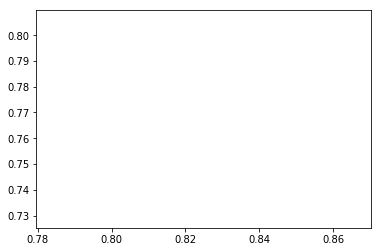

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

#precision, recall, thresholds = precision_recall_curve(y_test, best_svc_predicted)

for i in range(0, len(threshholds)):
    recall = recalls[i]
    precision = precisions[i]
    plt.figure()
    plt.plot(recall, precision, color='black')
    plt.fill_between(recall, precision, alpha=0.1, color='blue')
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.01])
    plt.title('Precision-Recall Curve, Threshhold', fontsize=20)
    plt.show()

Note: investigate why this precision-recall curve is so simple.

### Step 3: Choose Acceptable Trade-Off between Precision and Recall

The optimal SVC C=1e7, gamma=1e-07) would catch about 80% of fraudulent cases and would misidentify 1 out of 20 non-fraud cases.  One can use a decision function for the classifier and vary the prediction threshold to "adjust" the balance between precision and recall. If we want our fraud detector to be more precise in transactions it flags and less annoying to customers we can raise the threshold to require greater confidence in our decisions.  Alternatively, if we want to be sure to capture most fraud occurences, we can lower the threshold.

Using the training set and the decision function for the classifier with the best recall score, we vary the prediction threshold to create a listing of precision/recall trade-off values flagging "good" accuracy, recall and precision values.

In [18]:
# Use training set
best_y_train_scores = best_svc.decision_function(X_train)
best_y_test_scores = best_svc.decision_function(X_test)
good_accuracy = 0.99
good_recall = 0.75
good_precision = 0.95

for x in range(-1,8):
    threshold = x/2.0 # values of threshold chosen by generate and test
    print()
    print("threshold =", threshold)
    # training data predictions
    svc_train_predicted = [int(b) for b in best_y_train_scores >= threshold]
    print("SVC training recall = ", recall_score(y_train, svc_train_predicted))
    print("SVC training precision = ", precision_score(y_train, svc_train_predicted))
    print("SVC training accuracy = ", accuracy_score(y_train, svc_train_predicted))

    # test data predictions
    svc_test_predicted = [int(b) for b in best_y_test_scores >= threshold]
    
    test_accuracy = accuracy_score(y_test, svc_test_predicted)
    accuracy_flag = '*' if test_accuracy > good_accuracy else ''
    print("SVC test accuracy = ", accuracy_score(y_test, svc_test_predicted), accuracy_flag)   
    
    test_recall = recall_score(y_test, svc_test_predicted)
    recall_flag = '*' if test_recall > good_recall else ''
    print("SVC test recall = ", recall_score(y_test, svc_test_predicted), recall_flag)
    
    test_precision = precision_score(y_test, svc_test_predicted)
    precision_flag = '*' if test_precision > good_precision else ''
    print("SVC test precision = ", precision_score(y_test, svc_test_predicted), precision_flag)


threshold = -0.5
SVC training recall =  0.8260869565217391
SVC training precision =  0.957983193277311
SVC training accuracy =  0.9964349376114082
SVC test accuracy =  0.9963126843657817 *
SVC test recall =  0.8 *
SVC test precision =  0.9411764705882353 

threshold = 0.0
SVC training recall =  0.822463768115942
SVC training precision =  0.9659574468085106
SVC training accuracy =  0.996496404204315
SVC test accuracy =  0.9964970501474927 *
SVC test recall =  0.8 *
SVC test precision =  0.9552238805970149 *

threshold = 0.5
SVC training recall =  0.8152173913043478
SVC training precision =  0.9782608695652174
SVC training accuracy =  0.9965578707972217
SVC test accuracy =  0.9964970501474927 *
SVC test recall =  0.8 *
SVC test precision =  0.9552238805970149 *

threshold = 1.0
SVC training recall =  0.8115942028985508
SVC training precision =  0.9824561403508771
SVC training accuracy =  0.9965578707972217
SVC test accuracy =  0.9963126843657817 *
SVC test recall =  0.7875 *
SVC test pr

## Conclusions

Depending on one's goals, use the above process to set an appropriate prediction threshold. It would probably be useful to try different types of classifiers on this problem such as logistic regression, Naive Bayes, neural networks etc.  One should also try some different SVC kernels.

If one were to attempt to develop a classifier on the original Kaggle data set ([original Kaggle data set](https://www.kaggle.com/isaikumar/creditcardfraud), it is unlikely that support vector approaches would be realistic due to the much larger size of the data set, unless one had significant computing power available.  As mentioned, the 'Time' column in the original data set would probably require a time-series analysis. Since the original data set contains equal number of fraud and non-fraud cases, the accuracy measure would probably me more appropriate compared to the recall measure.